In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 3000

zmin = 1
zmax = 5

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

In [3]:
from scipy.interpolate import LinearNDInterpolator


In [4]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [5]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [6]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [7]:
from scipy.integrate import quad_vec

In [8]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3000/3000 [10:45<00:00,  4.65it/s] 


In [9]:
import matplotlib.pyplot as plt

In [11]:
np.save('/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax), unfiltered_auto)

0.0006581588668570017 0.0006581588668570017


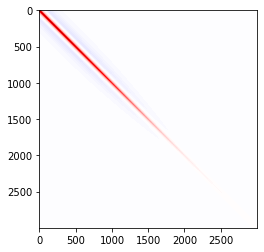

0.0006590084495047855 0.0006590084495047855


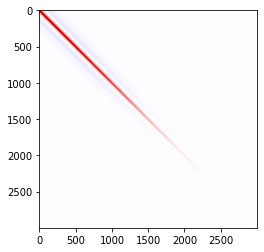

0.000659885874181513 0.000659885874181513


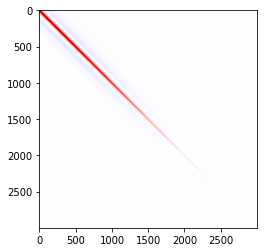

0.0006607857919098491 0.0006607857919098491


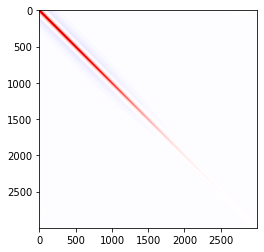

0.0006617013515439279 0.0006617013515439279


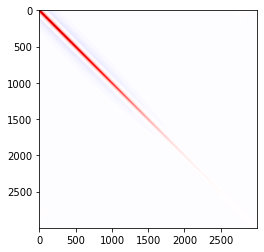

0.0006626239701145214 0.0006626239701145214


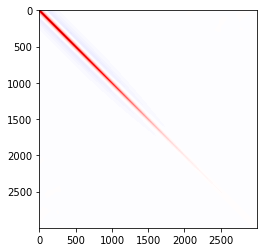

0.0006635430873416971 0.0006635430873416971


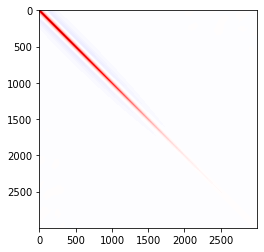

0.0006644459057503839 0.0006644459057503839


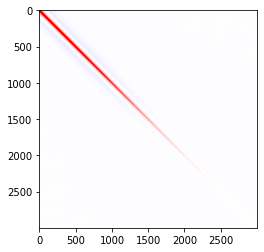

0.0006653171084641417 0.0006653171084641417


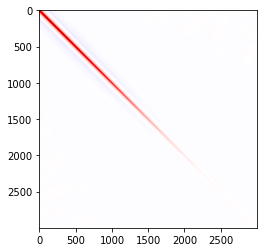

0.0006661385654657344 0.0006661385654657344


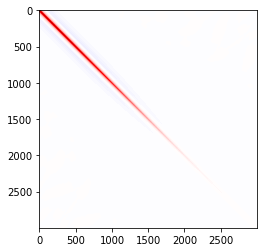

0.0006668890424072766 0.0006668890424072766


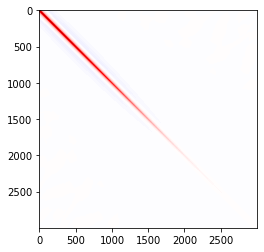

0.0006675438943244704 0.0006675438943244704


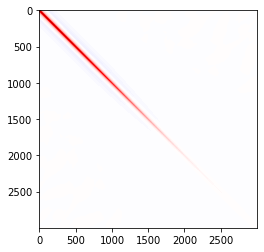

0.0006680747851454985 0.0006680747851454985


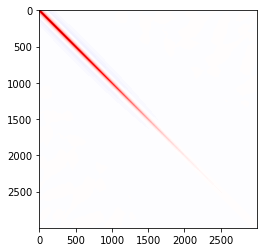

0.0006684494254448026 0.0006684494254448026


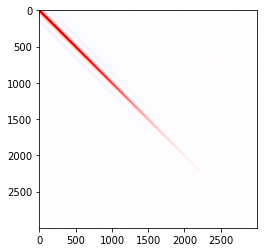

0.0006686313592262642 0.0006686313592262642


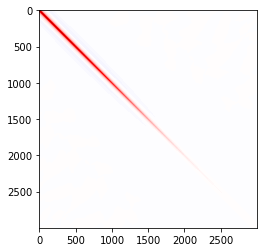

0.0006685798120528758 0.0006685798120528758


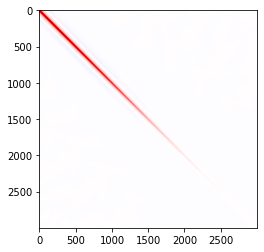

0.0006682496501691253 0.0006682496501691253


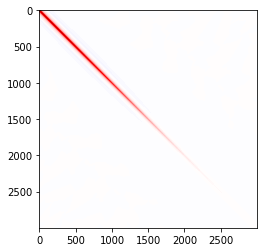

0.0006675914606332824 0.0006675914606332824


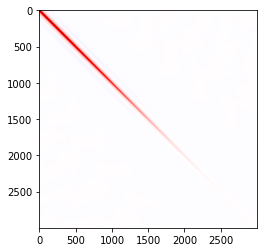

0.0006665518259617632 0.0006665518259617632


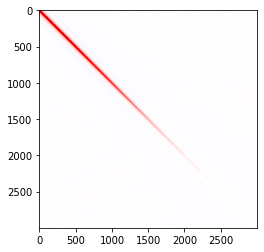

0.0006650738181652967 0.0006650738181652967


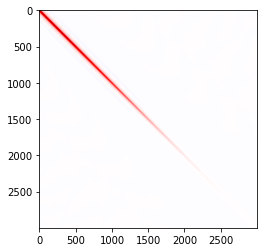

0.0006630977905765174 0.0006630977905765174


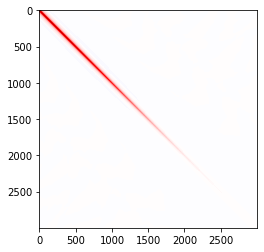

0.000660562529339036 0.000660562529339036


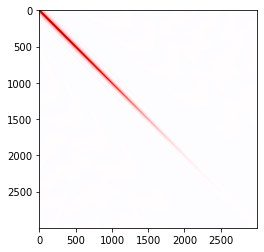

0.0006574067854967517 0.0006574067854967517


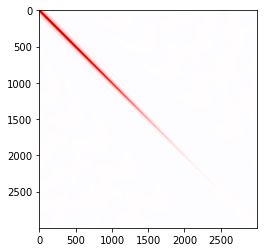

0.000653571320424708 0.000653571320424708


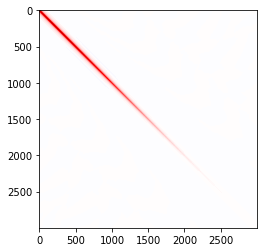

0.0006492309169439186 0.0006492309169439186


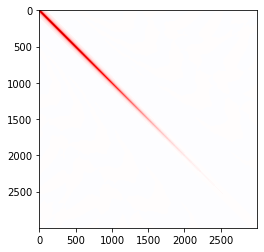

0.0006442763135485398 0.0006442763135485398


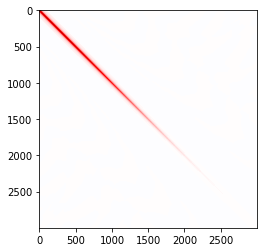

0.0006385218843247739 0.0006385218843247739


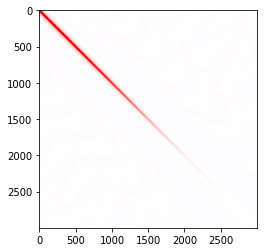

0.0006319387599199246 0.0006319387599199246


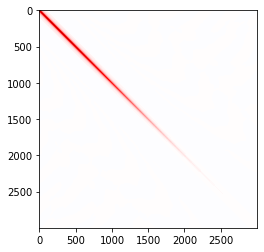

0.000624630922874678 0.000624630922874678


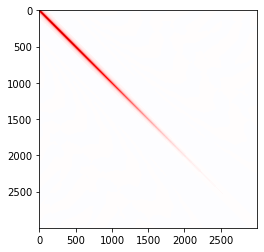

0.0006165362264266158 0.0006165362264266158


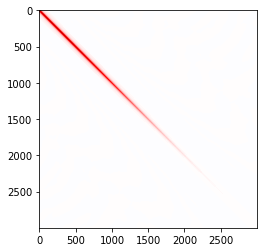

0.0006076400889904917 0.0006076400889904917


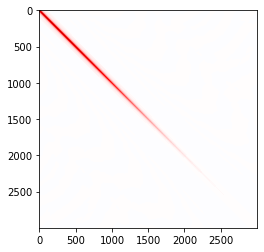

0.000598034428995834 0.000598034428995834


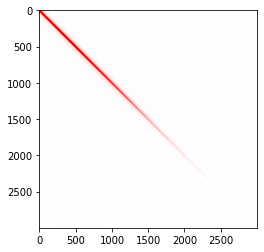

0.0005878026071956999 0.0005878026071956999


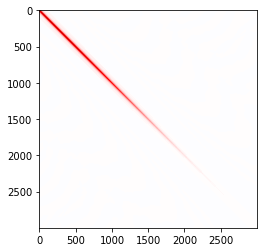

0.0005770001142483998 0.0005770001142483998


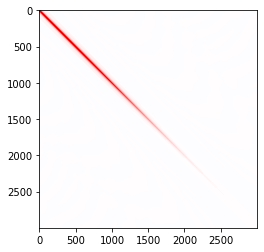

0.000565754155463559 0.000565754155463559


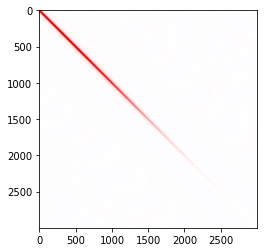

0.0005542052738152124 0.0005542052738152124


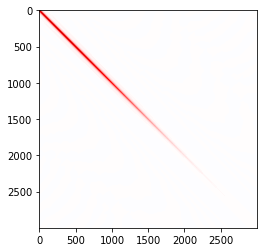

0.0005424833961783817 0.0005424833961783817


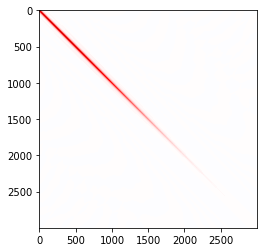

0.0005307441545087273 0.0005307441545087273


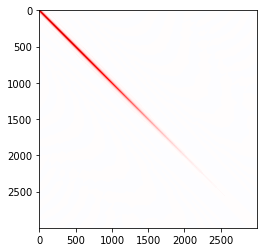

0.00051912606261328 0.00051912606261328


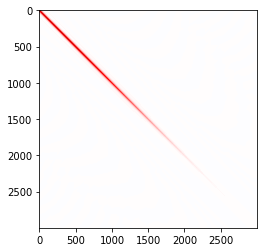

0.0005076772213494519 0.0005076772213494519


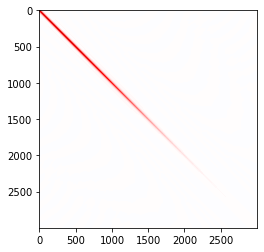

0.0004963533444909927 0.0004963533444909927


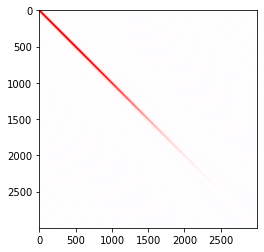

0.00048502119949785463 0.00048502119949785463


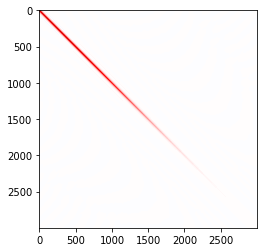

0.0004734867903317682 0.0004734867903317682


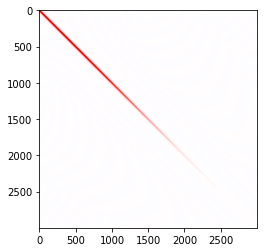

0.00046166679025355954 0.00046166679025355954


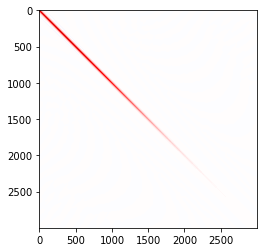

0.00044915335000488726 0.00044915335000488726


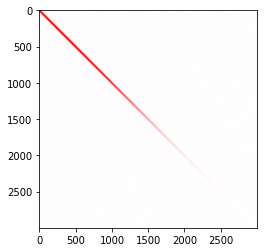

0.00043578991937965597 0.00043578991937965597


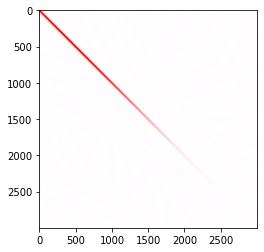

0.00042159315079368526 0.00042159315079368526


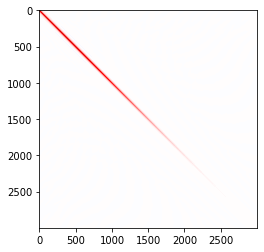

0.0004060423023559976 0.0004060423023559976


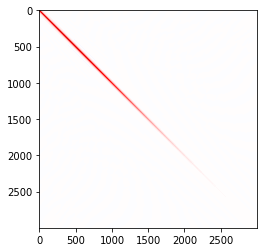

0.00038930537897343217 0.00038930537897343217


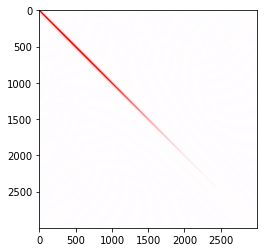

0.0003719664069936813 0.0003719664069936813


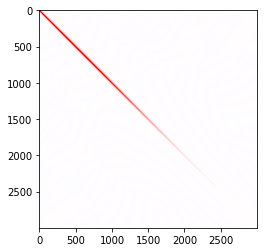

0.00035483163846219653 0.00035483163846219653


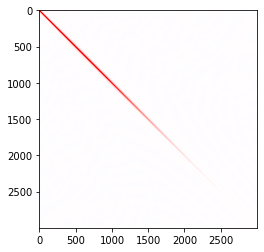

0.000338210265521996 0.000338210265521996


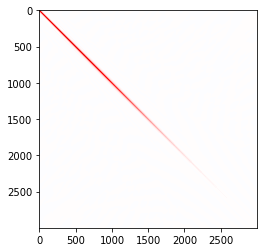

0.000323046375312469 0.000323046375312469


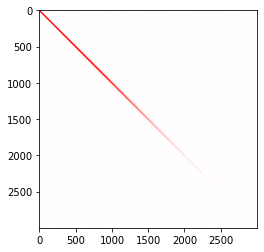

0.0003097253623025605 0.0003097253623025605


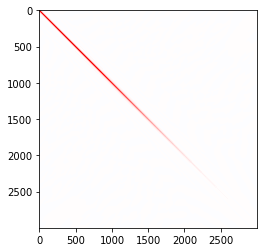

0.00029760658810217103 0.00029760658810217103


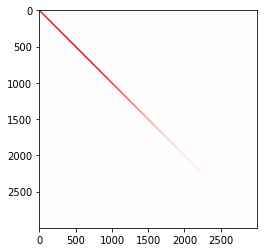

0.00028570082909475396 0.00028570082909475396


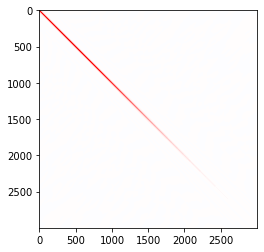

0.000273093081102181 0.000273093081102181


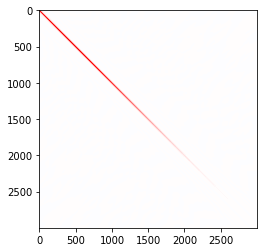

0.0002596947276419938 0.0002596947276419938


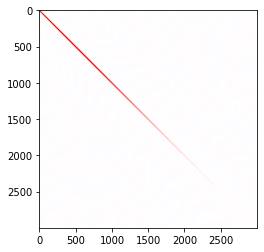

0.0002450101986418745 0.0002450101986418745


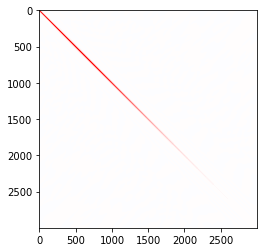

0.0002302914760142424 0.0002302914760142424


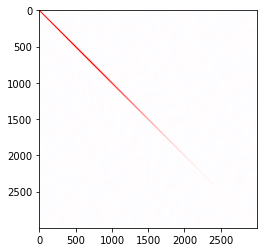

0.00021696635454282283 0.00021696635454282283


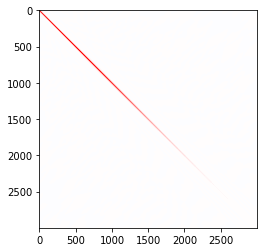

0.0002056581119472424 0.0002056581119472424


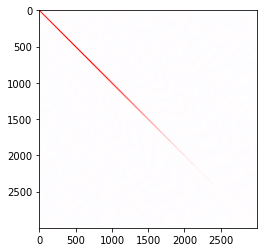

0.00019549048937486785 0.00019549048937486785


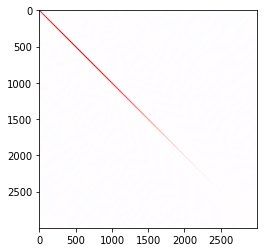

0.00018489431636767664 0.00018489431636767664


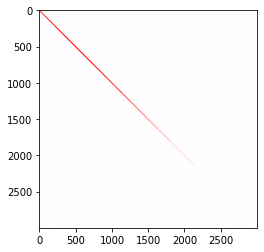

0.00017341365214153023 0.00017341365214153023


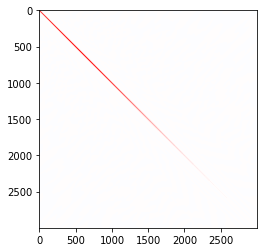

0.00016202045733256477 0.00016202045733256477


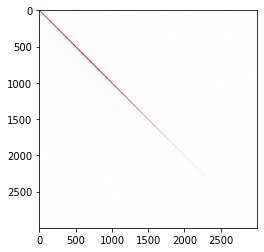

0.00015200561921803653 0.00015200561921803653


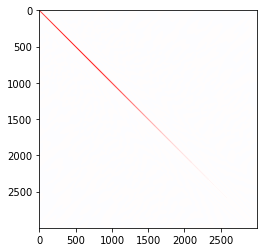

0.00014320616265670172 0.00014320616265670172


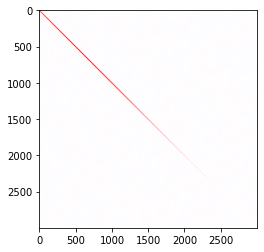

0.00013429059644846773 0.00013429059644846773


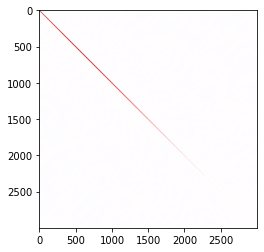

0.00012527418415328166 0.00012527418415328166


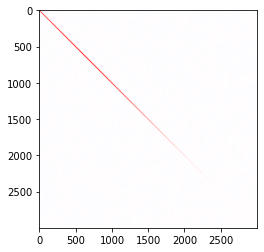

0.00011678584107792603 0.00011678584107792603


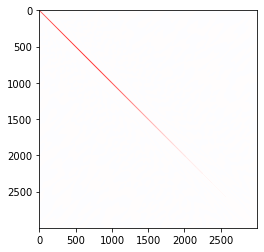

0.00010927276343243558 0.00010927276343243558


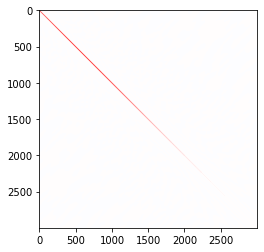

0.00010194423909289584 0.00010194423909289584


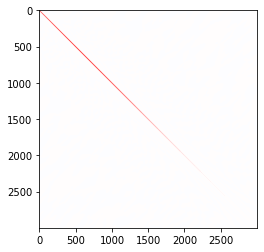

9.475641647277192e-05 9.475641647277192e-05


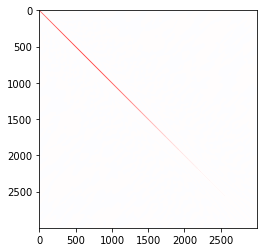

8.82225687321413e-05 8.82225687321413e-05


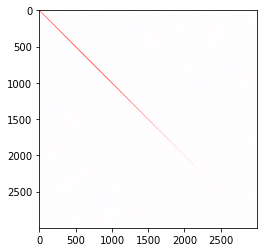

8.202091175103608e-05 8.202091175103608e-05


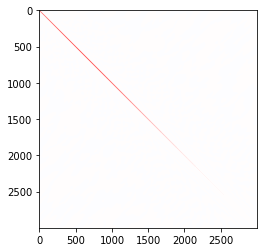

7.608738822696358e-05 7.608738822696358e-05


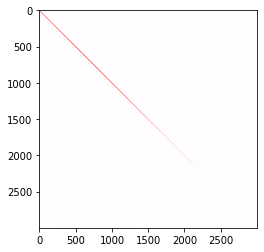

7.060765178900676e-05 7.060765178900676e-05


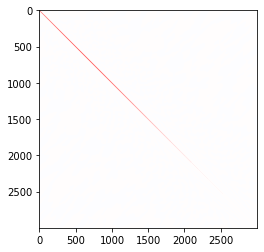

6.540286503067839e-05 6.540286503067839e-05


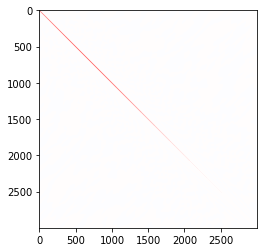

6.054926046303908e-05 6.054926046303908e-05


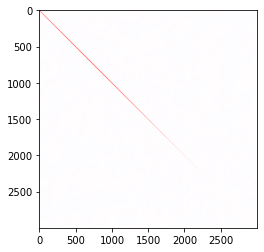

5.5994490444809574e-05 5.5994490444809574e-05


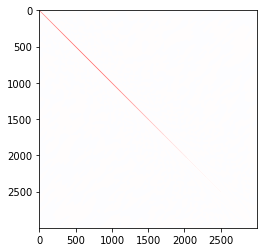

5.173976652711028e-05 5.173976652711028e-05


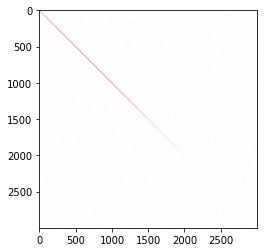

4.776391378008946e-05 4.776391378008946e-05


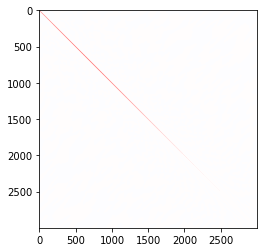

4.405876929934048e-05 4.405876929934048e-05


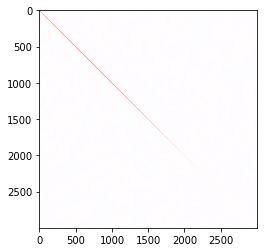

4.060566400688844e-05 4.060566400688844e-05


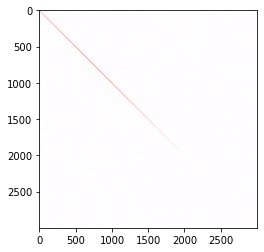

3.7391314433535844e-05 3.7391314433535844e-05


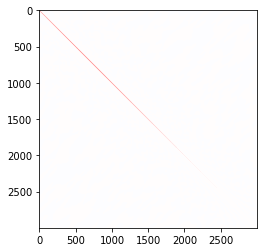

3.440936548753134e-05 3.440936548753134e-05


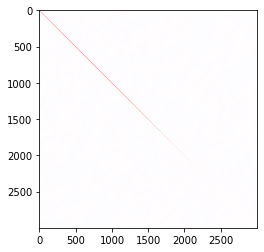

3.1645052003772544e-05 3.1645052003772544e-05


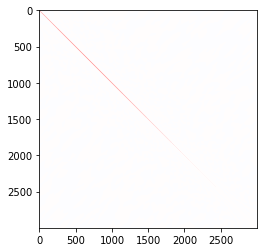

2.908150270929937e-05 2.908150270929937e-05


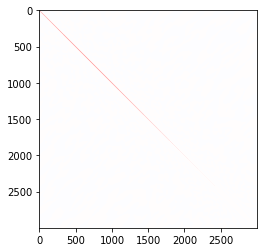

2.6706183199859662e-05 2.6706183199859662e-05


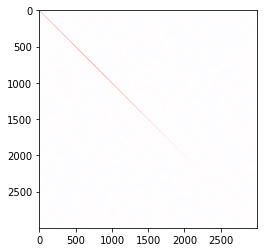

2.4507228316563932e-05 2.4507228316563932e-05


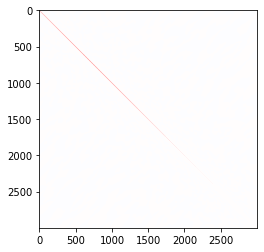

2.2473485827590404e-05 2.2473485827590404e-05


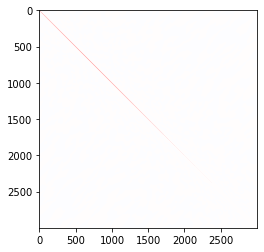

2.05944348168353e-05 2.05944348168353e-05


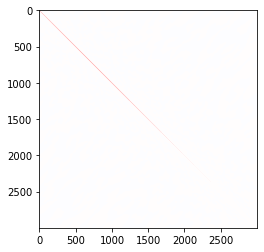

1.8859997937082677e-05 1.8859997937082677e-05


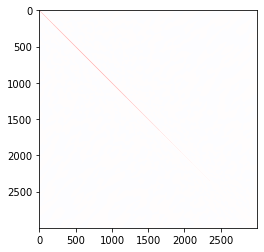

1.7260519962602855e-05 1.7260519962602855e-05


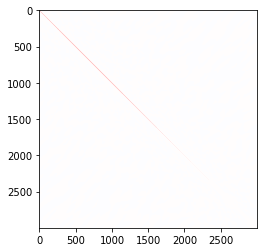

1.57868054182289e-05 1.57868054182289e-05


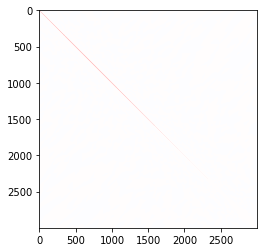

1.4430075628197561e-05 1.4430075628197561e-05


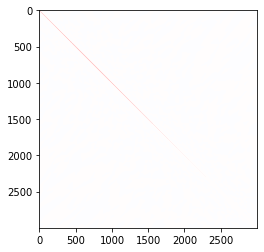

1.3182041002200684e-05 1.3182041002200684e-05


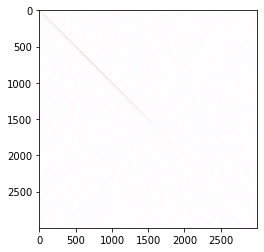

1.2034909329472903e-05 1.2034909329472903e-05


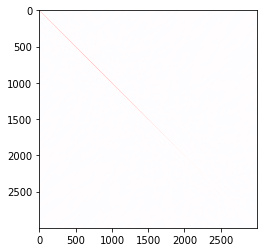

1.0981344546879568e-05 1.0981344546879568e-05


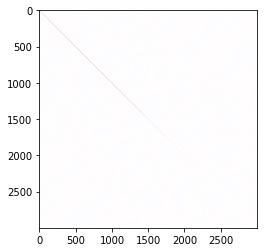

In [10]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()